In [126]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [127]:
data_info = pd.read_csv('C:\\Users\\akhan\\Desktop\\datasets\\lending_club_info.csv')

In [128]:
data_info

,LoanStatNew,Description
0,loan_amnt,The listed amount of the loan applied for by t...
1,term,The number of payments on the loan. Values are...
2,int_rate,Interest Rate on the loan
3,installment,The monthly payment owed by the borrower if th...
4,grade,LC assigned loan grade
5,sub_grade,LC assigned loan subgrade
6,emp_title,The job title supplied by the Borrower when ap...
7,emp_length,Employment length in years. Possible values ar...
8,home_ownership,The home ownership status provided by the borr...
9,annual_inc,The self-reported annual income provided by th...


In [129]:
df = pd.read_csv('C:\\Users\\akhan\\Desktop\\datasets\\lending_club_loan_two.csv')

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

# 1) Explatory Data Analysis

#### Fully paid vs Charged off (target variable)

<AxesSubplot:xlabel='loan_status', ylabel='count'>

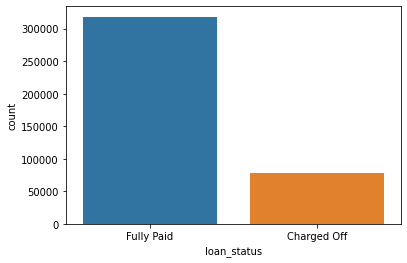

In [131]:
sns.countplot(x = 'loan_status', data = df)

### ** NOTE:
Target variable is unbalanced, it results to get a high classification accuracy. So, classification accuracy is not a good measure in this problem.
We need to use recall and precision to evaluate our model.

#### histogram of loan amount

C:\Software\Anaconda\envs\TF2_new_PY\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


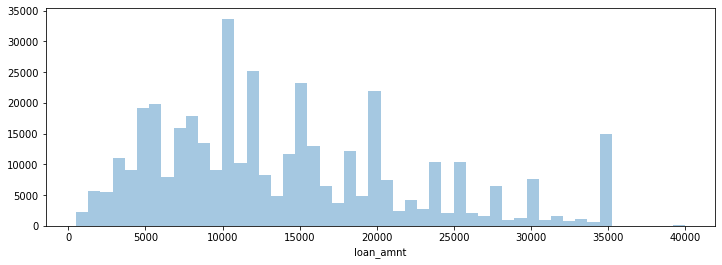

In [132]:
plt.figure(figsize=(12,4))
sns.distplot(df['loan_amnt'], kde = False)
plt.show()

#### correlation between variables

In [133]:
df.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


<AxesSubplot:>

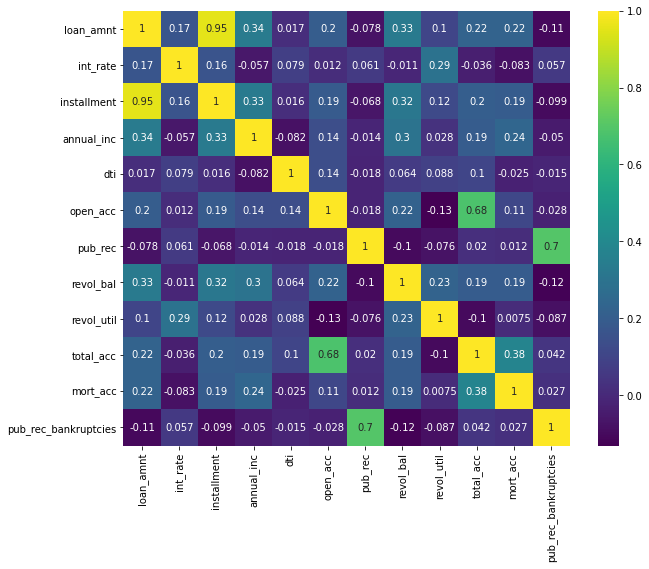

In [134]:
plt.figure(figsize = (10,8))
sns.heatmap(df.corr(), annot = True, cmap = 'viridis')

<AxesSubplot:xlabel='installment', ylabel='loan_amnt'>

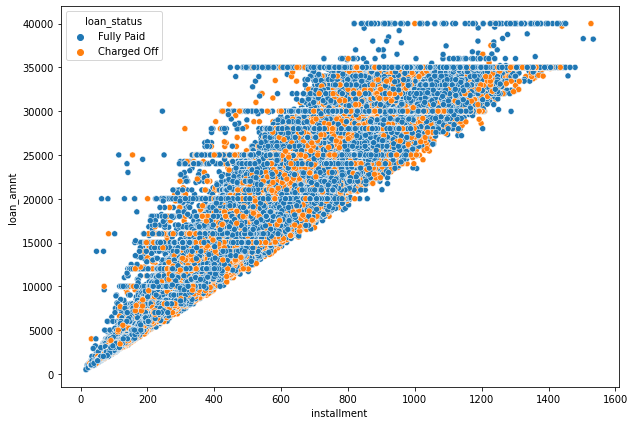

In [135]:
plt.figure(figsize = (10,7))
sns.scatterplot(x = 'installment', y = 'loan_amnt', hue = 'loan_status', data = df)

#### Note: 
A high correlation between 'installment' and 'loan_amnt'.

#### loan status vs loan amount

<AxesSubplot:xlabel='loan_status', ylabel='loan_amnt'>

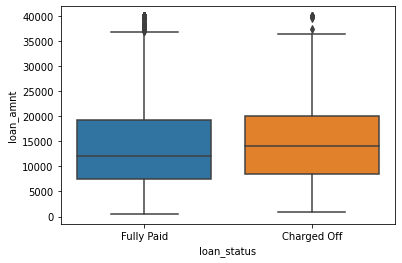

In [136]:
sns.boxplot(x = 'loan_status', y = 'loan_amnt', data = df)

In [137]:
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


#### Anlysis:
Charged off loans have slightly larger loan amount on average 

#### grade and subgrade variables

In [138]:
sorted(df['grade'].unique())

['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [139]:
sorted(df['sub_grade'].unique())

['A1',
 'A2',
 'A3',
 'A4',
 'A5',
 'B1',
 'B2',
 'B3',
 'B4',
 'B5',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'E1',
 'E2',
 'E3',
 'E4',
 'E5',
 'F1',
 'F2',
 'F3',
 'F4',
 'F5',
 'G1',
 'G2',
 'G3',
 'G4',
 'G5']

In [140]:
%config Completer.use_jedi = False

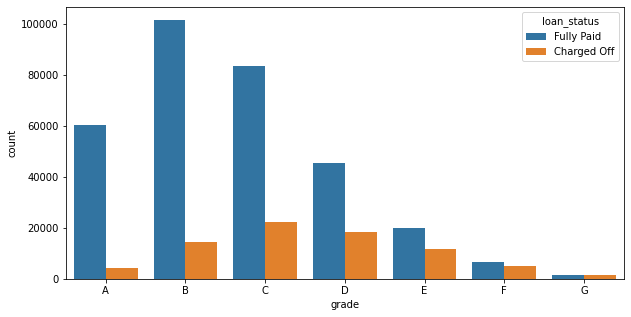

In [141]:
plt.figure(figsize = (10,5))
grade_order = sorted(df['grade'].unique())
sns.countplot(x = 'grade', hue = 'loan_status', order = grade_order, data = df)
plt.show()

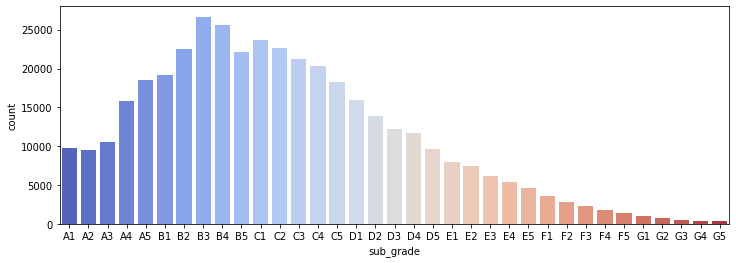

In [142]:
plt.figure(figsize = (12,4))
subgrade_order = sorted(df['sub_grade'].unique())
sns.countplot(x = 'sub_grade', order = subgrade_order, palette = 'coolwarm', data = df)
plt.show()

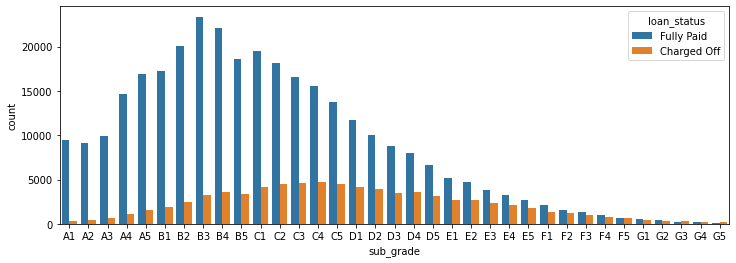

In [143]:
plt.figure(figsize = (12,4))
subgrade_order = sorted(df['sub_grade'].unique())
sns.countplot(x = 'sub_grade', hue = 'loan_status', order = subgrade_order,data = df)
plt.show()

##### Analysis:
The ratio of charged off / Fully paid is increasing from A1 grade to G5

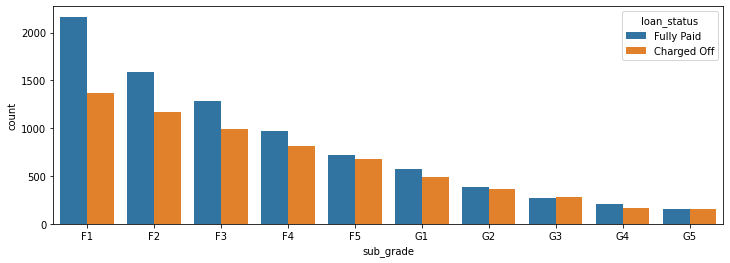

In [144]:
f_and_g = df[(df['grade']=='G') | (df['grade']=='F')]
plt.figure(figsize = (12,4))
subgrade_order = sorted(f_and_g['sub_grade'].unique())
sns.countplot(x = 'sub_grade', hue = 'loan_status', order = subgrade_order,data = f_and_g)
plt.show()

##### Analysis:
There is a 50% chance that people rated as G5, don't pay back the loan!

#### Dummy values of target variable

In [145]:
df['loan_repaid'] = df['loan_status'].map({'Charged Off':0 , 'Fully Paid':1})

In [146]:
df[['loan_repaid', 'loan_status']]

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off
...,...,...
396025,1,Fully Paid
396026,1,Fully Paid
396027,1,Fully Paid
396028,1,Fully Paid


[]

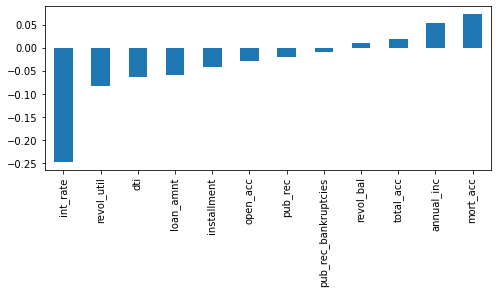

In [147]:
plt.figure(figsize = (8,3))
df.corr()['loan_repaid'][:-1].sort_values().plot(kind='bar')
plt.plot()

### Analysis:
The high and negative correlation between repaying the loan (loan_repaid) and interest rate.

# 2) Data Preprocessing

### 2.1) Missing Values

In [148]:
len(df)

396030

In [149]:
df.isnull().sum() 

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

#### Percentage of missing values:

In [150]:
100*df.isnull().sum() / len(df)

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

#### Note:
the percentage of missing values is high in emp_title, emp_length and mort_acc and we can't just drop for example 10% of data because of mort_acc. we should check if they are really good variables to expalin Y or not. If not we can drop these variables.

In [151]:
df['emp_title'].nunique()

173105

In [152]:
df['emp_title'].value_counts()

Teacher                                     4389
Manager                                     4250
Registered Nurse                            1856
RN                                          1846
Supervisor                                  1830
                                            ... 
Pergo LLc                                      1
Information developer                          1
Glenwood Care Center                           1
Field mechanic                                 1
Technical Project Manager/Software Devel       1
Name: emp_title, Length: 173105, dtype: int64

In [153]:
df = df.drop('emp_title',axis=1)

#### note:
it is better to drop this emp_title variable as it has too many unique string values

In [154]:
emp_length_order = [ '< 1 year',
                      '1 year',
                     '2 years',
                     '3 years',
                     '4 years',
                     '5 years',
                     '6 years',
                     '7 years',
                     '8 years',
                     '9 years',
                     '10+ years']

<AxesSubplot:xlabel='emp_length', ylabel='count'>

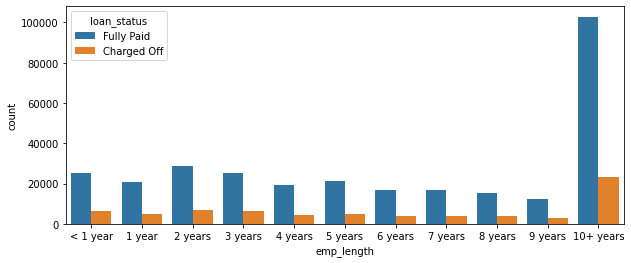

In [155]:
plt.figure(figsize = (10,4))
sns.countplot(x = 'emp_length', data = df, hue = 'loan_status', order = emp_length_order)

In [156]:
temp1 = df[df['loan_status'] == 'Fully Paid'].groupby('emp_length')['loan_status'].count()

In [157]:
temp2 = df[df['loan_status'] == 'Charged Off'].groupby('emp_length')['loan_status'].count()

<AxesSubplot:xlabel='emp_length'>

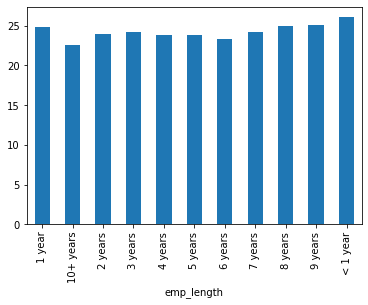

In [158]:
(100*temp2/temp1).plot(kind = 'bar')

#### Note:
we see that ratio of charged off / fully paid (temp2 / temp1) is almost the same among different emp_length values. Accordingly, this variable does not provide that much information about a person being a charged off or fully paid. And we drop it.

In [159]:
df = df.drop('emp_length', axis = 1)

In [160]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [161]:
df = df.drop('title', axis = 1)

<AxesSubplot:xlabel='mort_acc', ylabel='count'>

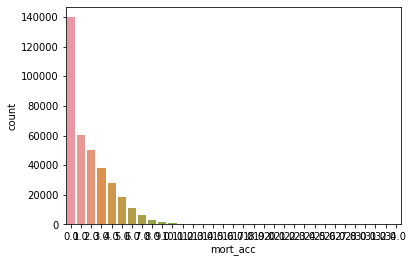

In [162]:
sns.countplot(x = 'mort_acc', data = df)

#### Filling missing values of mort_acc:

In [163]:
df.corr()['mort_acc'].sort_values()

int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

In [164]:
df.groupby('total_acc').mean()['mort_acc']


total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

In [165]:
total_acc_avg = df.groupby('total_acc').mean()['mort_acc']

In [166]:
def fill_mort_acc(total_acc, mort_acc):
    
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc]
    else:
        return mort_acc
    

In [167]:
df['mort_acc'] = df.apply(lambda x: fill_mort_acc(x['total_acc'], x['mort_acc']), axis=1)

#### **Note:
I am substituting missing values of 'mort_acc' with average value of 'mort_acc' when it is grouped by total_acc. 
I selected total_acc for grouping as it has the highest correlation with mort_acc.

In [168]:
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

In [169]:
df = df.dropna()

In [170]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

#### Note:
now there is no missing data. 

### 2.2) Categorical Variables

In [171]:
df.select_dtypes(['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

In [172]:
df['term'] = df['term'].apply(lambda term : int(term[:3]))

In [173]:
df = df.drop('grade', axis = 1)

In [174]:
dummies = pd.get_dummies(df['sub_grade'], drop_first = True)

In [175]:
df = pd.concat([df.drop('sub_grade', axis = 1), dummies], axis = 1)

In [176]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address',
       'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5',
       'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4',
       'G5'],
      dtype='object')

In [177]:
dummies = pd.get_dummies(df[['verification_status', 'application_type','initial_list_status','purpose' ]],drop_first=True)
df = df.drop(['verification_status', 'application_type','initial_list_status','purpose'],axis=1)
df = pd.concat([df,dummies],axis=1)

In [178]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

In [179]:
df['home_ownership'] = df['home_ownership'].replace(['NONE', 'ANY'], 'OTHER')

In [180]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          142
Name: home_ownership, dtype: int64

In [181]:
dummies = pd.get_dummies(df['home_ownership'],drop_first=True)
df = df.drop('home_ownership',axis=1)
df = pd.concat([df,dummies],axis=1)

In [182]:
df['zip_code'] = df['address'].apply(lambda address : address[-5:])

#### Note
taking out zip code from address, to use as a variable

In [183]:
df['zip_code'].value_counts()

70466    56880
22690    56413
30723    56402
48052    55811
00813    45725
29597    45393
05113    45300
11650    11210
93700    11126
86630    10959
Name: zip_code, dtype: int64

In [184]:
dummies = pd.get_dummies(df['zip_code'],drop_first=True)
df = df.drop('zip_code',axis=1)
df = pd.concat([df,dummies],axis=1)

In [185]:
df = df.drop('address',axis = 1)

In [186]:
df = df.drop('issue_d', axis = 1)

#### Note
month of issuance does not provide any information, should be dropped.

In [188]:
df['earliest_cr_year'] = df['earliest_cr_line'].apply(lambda date: int(date[-4:]))

In [189]:
df = df.drop('earliest_cr_line',axis=1)

#### Note
Just taking the year from 'earliest_cr_line'

In [190]:
df.select_dtypes(['object']).columns

Index(['loan_status'], dtype='object')

In [192]:
df = df.drop('loan_status', axis = 1)

#### Note
now there is no object variable in df.

# 3) The Model

### 3.1) Train Test Split

In [193]:
from sklearn.model_selection import train_test_split

In [194]:
X = df.drop('loan_repaid', axis = 1).values

In [195]:
y = df['loan_repaid'].values


In [ ]:
#df = df.sample(frac = 0.1, random_state = 13)

In [196]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 3.2) Normalizing The Data

In [197]:
from sklearn.preprocessing import MinMaxScaler

In [198]:
scaler = MinMaxScaler()

In [199]:
X_train = scaler.fit_transform(X_train)

In [200]:
X_test = scaler.transform(X_test)

### 3.3) Building The Model

In [202]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [204]:
X_train.shape

(316175, 78)

##### The architecture of the model
78 --> 39 --> 19 --> 1

In [258]:
model = Sequential()


model.add(Dense(78, activation= 'relu'))
model.add(Dropout(0.2))

model.add(Dense(39, activation= 'relu'))
model.add(Dropout(0.2))

model.add(Dense(19, activation= 'relu'))
model.add(Dropout(0.2))


model.add(Dense(units = 1, activation= 'sigmoid'))


In [259]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam')

In [260]:
model.fit(x = X_train, y = y_train, epochs = 25, batch_size = 256,
          validation_data = (X_test, y_test))

Epoch 1/25
1236/1236 [==============================] - 2s 2ms/step - loss: 0.2976 - val_loss: 0.2631
Epoch 2/25
1236/1236 [==============================] - 2s 1ms/step - loss: 0.2658 - val_loss: 0.2606
Epoch 3/25
1236/1236 [==============================] - 2s 1ms/step - loss: 0.2631 - val_loss: 0.2597
Epoch 4/25
1236/1236 [==============================] - 2s 1ms/step - loss: 0.2620 - val_loss: 0.2592
Epoch 5/25
1236/1236 [==============================] - 2s 1ms/step - loss: 0.2612 - val_loss: 0.2591
Epoch 6/25
1236/1236 [==============================] - 2s 1ms/step - loss: 0.2605 - val_loss: 0.2591
Epoch 7/25
1236/1236 [==============================] - 2s 1ms/step - loss: 0.2603 - val_loss: 0.2594
Epoch 8/25
1236/1236 [==============================] - 2s 1ms/step - loss: 0.2600 - val_loss: 0.2594
Epoch 9/25
1236/1236 [==============================] - 2s 1ms/step - loss: 0.2595 - val_loss: 0.2594
Epoch 10/25
1236/1236 [==============================] - 2s 1ms/step - loss: 0.259

In [261]:
#from tensorflow.keras.models import load_model

In [262]:
#model.save('lending_club_model')

In [263]:
df_loss = pd.DataFrame(model.history.history)
df_loss

,loss,val_loss
0,0.297552,0.263103
1,0.265810,0.260593
2,0.263090,0.259710
3,0.262006,0.259222
4,0.261228,0.259057
5,0.260540,0.259099
6,0.260272,0.259354
7,0.259989,0.259387
8,0.259487,0.259405
9,0.259451,0.259156


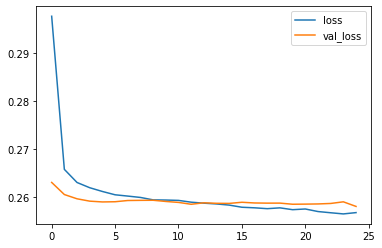

In [264]:
df_loss.plot()
plt.show()

In [251]:
### 3.4) Evaluating The Model

In [252]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [253]:
predictions = model.predict_classes(X_test)

In [254]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.98      0.44      0.61     15421
           1       0.88      1.00      0.94     63623

    accuracy                           0.89     79044
   macro avg       0.93      0.72      0.77     79044
weighted avg       0.90      0.89      0.87     79044



In [255]:
print('ratio of class 1 to num of observations :')
df['loan_repaid'].value_counts()[1]/(df['loan_repaid'].count())

ratio of class 1 to num of observations :


0.8038479931379817

#### Note:
for such unbalanced target variable, 90% accuracy is not an good measure of the performance and accuracy of the model. f1-score is a better metric.

In [256]:
confusion_matrix(y_test, predictions)

array([[ 6758,  8663],
       [  135, 63488]], dtype=int64)